In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projeto Ozempic - Semantix/ozempic_market_share_2022_2024_worldwide.csv")

In [ ]:
df.head()

,Month,Region,Competitor,Market_Share_%,Total_Sales_k,Price_Ozempic_USD
0,2022-01,North America,Ozempic,7.98,966,539.99
1,2022-01,North America,Victoza,51.20,966,539.99
2,2022-01,North America,Trulicity,22.40,966,539.99
3,2022-01,North America,Bydureon,15.53,966,539.99
4,2022-01,North America,Adlyxin,2.89,966,539.99


#Análise Exploratória dos Dados (EDA)

In [ ]:
#Limpeza e processamento dos dados:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1080 non-null   object 
 1   Region             1080 non-null   object 
 2   Competitor         1080 non-null   object 
 3   Market_Share_%     1080 non-null   float64
 4   Total_Sales_k      1080 non-null   int64  
 5   Price_Ozempic_USD  1080 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 50.8+ KB


In [ ]:
#Convertendo a coluna 'month' para data:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month              1080 non-null   datetime64[ns]
 1   Region             1080 non-null   object        
 2   Competitor         1080 non-null   object        
 3   Market_Share_%     1080 non-null   float64       
 4   Total_Sales_k      1080 non-null   int64         
 5   Price_Ozempic_USD  1080 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 50.8+ KB


In [ ]:
#Procurar valores nulos:
df.isnull().sum()

,0
Month,0
Region,0
Competitor,0
Market_Share_%,0
Total_Sales_k,0
Price_Ozempic_USD,0


In [ ]:
#Procurar duplicatas:
df.duplicated().sum()

np.int64(0)

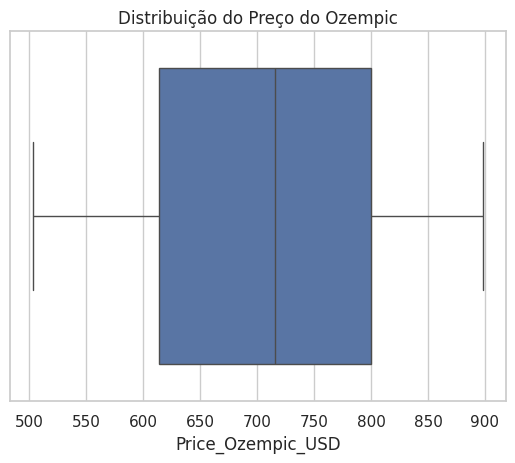

In [ ]:
#Verificar outliers - neste caso serão os preços muito fora do esperado:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Price_Ozempic_USD'])
plt.title("Distribuição do Preço do Ozempic")
plt.show()

In [ ]:
#Normalizar colunas:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Price_Scaled'] = scaler.fit_transform(df[['Price_Ozempic_USD']])

#Análise Descritiva dos Dados

In [ ]:
# Resumo estatístico
df.describe(include='all')

,Month,Region,Competitor,Market_Share_%,Total_Sales_k,Price_Ozempic_USD,Price_Scaled
count,1080,1080,1080,1080.000000,1080.000000,1080.000000,1080.000000
unique,NaN,6,5,NaN,NaN,NaN,NaN
top,NaN,North America,Ozempic,NaN,NaN,NaN,NaN
freq,NaN,180,216,NaN,NaN,NaN,NaN
mean,2023-06-16 18:40:00,NaN,NaN,20.000056,2680.004630,706.792778,0.515353
min,2022-01-01 00:00:00,NaN,NaN,0.010000,509.000000,502.780000,0.000000
25%,2022-09-23 12:00:00,NaN,NaN,6.985000,1571.500000,614.040000,0.281052
50%,2023-06-16 00:00:00,NaN,NaN,15.710000,2493.500000,715.335000,0.536931
75%,2024-03-08 18:00:00,NaN,NaN,29.902500,3798.000000,800.072500,0.750985
max,2024-12-01 00:00:00,NaN,NaN,89.520000,4999.000000,898.650000,1.000000


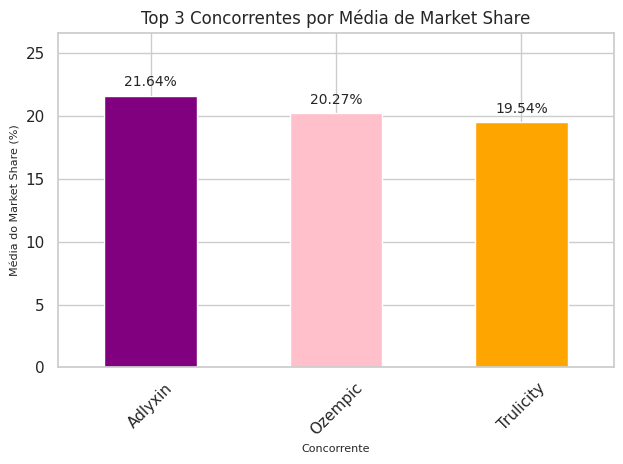

In [ ]:
#Identificar top 3 mais vendidos:

#Calcular a média de Market Share por concorrente no período todo:
top3 = df.groupby('Competitor')['Market_Share_%'].mean().sort_values(ascending=False).head(3)


import matplotlib.pyplot as plt

# top3 é uma Series, então:
fig, ax = plt.subplots()  # Cria a figura e o eixo
top3.plot(kind='bar', color=['purple', 'pink', 'orange'], ax=ax)
plt.title('Top 3 Concorrentes por Média de Market Share')
plt.xlabel('Concorrente', fontsize=8)
plt.ylabel('Média do Market Share (%)',fontsize=8)
plt.xticks(rotation=45)
ax.set_ylim(0, top3.max() + 5)
for i, valor in enumerate(top3):
    ax.text(i, valor + 0.5, f'{valor:.2f}%', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


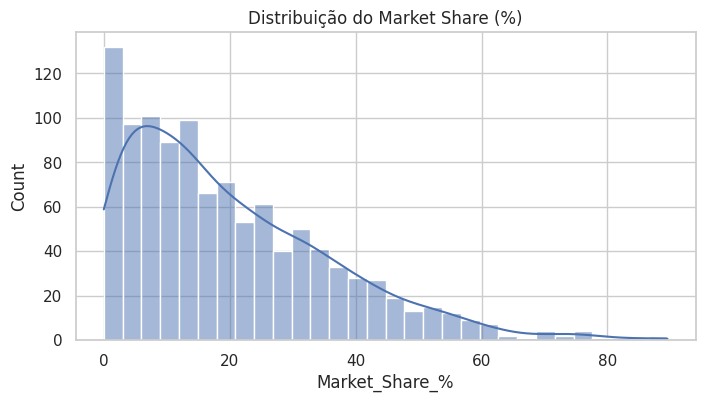

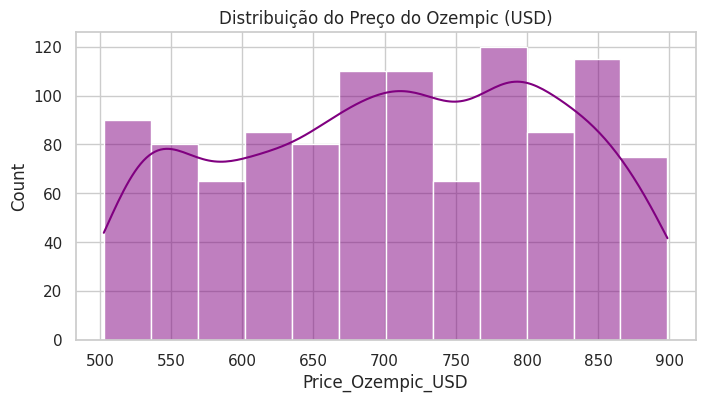

In [ ]:
# Distribuição das Variáveis Principais
import seaborn as sns
import matplotlib.pyplot as plt

# Market Share
plt.figure(figsize=(8, 4))
sns.histplot(df['Market_Share_%'], kde=True, bins=30)
plt.title("Distribuição do Market Share (%)")
plt.show()

# Preço
plt.figure(figsize=(8, 4))
sns.histplot(df['Price_Ozempic_USD'], kde=True, color="purple")
plt.title("Distribuição do Preço do Ozempic (USD)")
plt.show()

In [ ]:
#Tendência ao longo do tempo:
top3_competitors = ['Adlyxin', 'Ozempic', 'Trulicity']
df_top3 = df[df['Competitor'].isin(top3_competitors)]

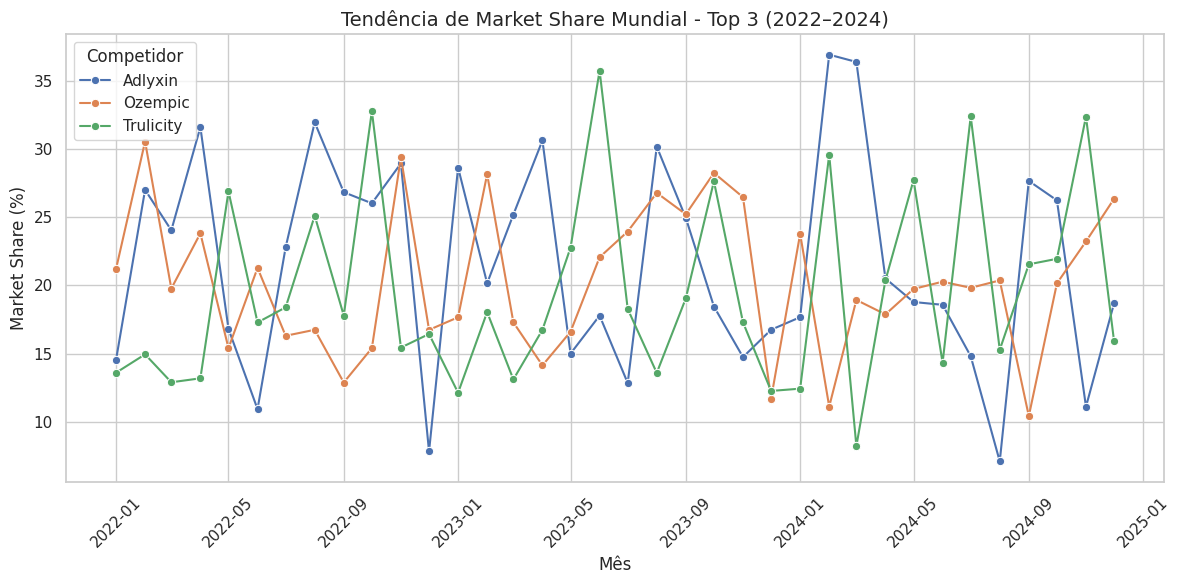

In [ ]:
# Agrupa só o Top 3
df_monthly_top3 = df_top3.groupby(['Month', 'Competitor'])['Market_Share_%'].mean().reset_index()

# Gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_top3, x='Month', y='Market_Share_%', hue='Competitor', marker="o")
plt.title("Tendência de Market Share Mundial - Top 3 (2022–2024)", fontsize=14)
plt.xlabel("Mês")
plt.ylabel("Market Share (%)")
plt.xticks(rotation=45)
plt.legend(title="Competidor")
plt.tight_layout()
plt.show()

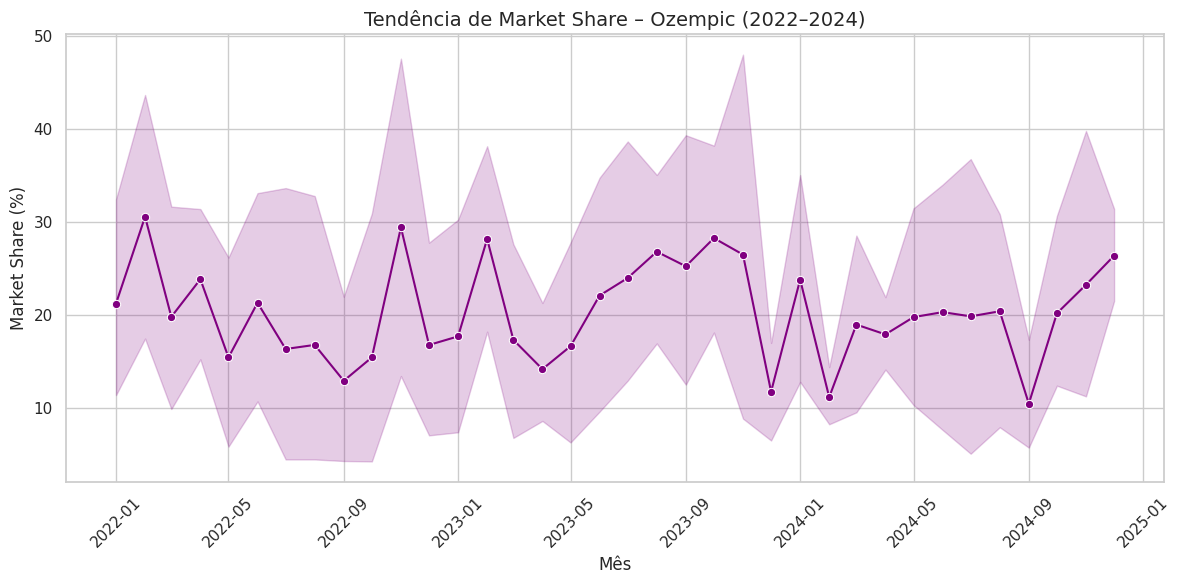

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar só os dados do Ozempic
ozempic_df = df[df['Competitor'] == 'Ozempic']

# Plotar a linha de tendência
plt.figure(figsize=(12, 6))
sns.lineplot(data=ozempic_df, x='Month', y='Market_Share_%', marker='o', color='purple')
plt.title("Tendência de Market Share – Ozempic (2022–2024)", fontsize=14)
plt.xlabel("Mês")
plt.ylabel("Market Share (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


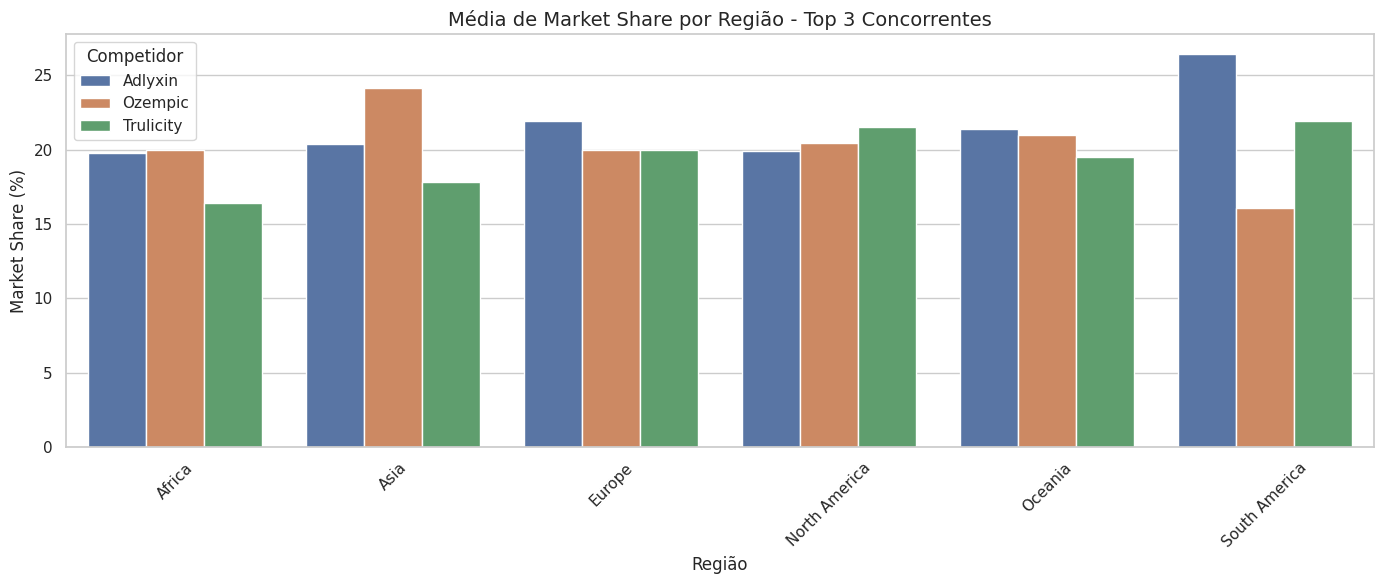

In [ ]:
#Padrão por região

top3_competitors = ['Adlyxin', 'Ozempic', 'Trulicity']
df_region_top3 = df[df['Competitor'].isin(top3_competitors)].groupby(['Region', 'Competitor'])['Market_Share_%'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=df_region_top3, x='Region', y='Market_Share_%', hue='Competitor')
plt.title("Média de Market Share por Região - Top 3 Concorrentes", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Market Share (%)")
plt.xlabel("Região")
plt.legend(title="Competidor")
plt.tight_layout()
plt.show()

#Identificação de Variáveis Importantes e Correlações

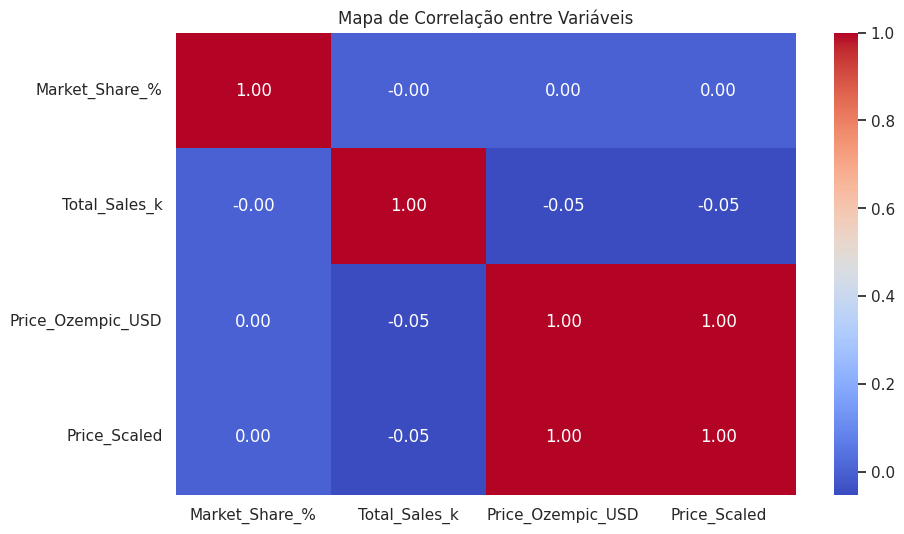

In [ ]:
#Mapa de Correlações

# Seleciona apenas as numéricas
numeric_cols = df.select_dtypes(include='number')

# Correlação
corr = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis")
plt.show()

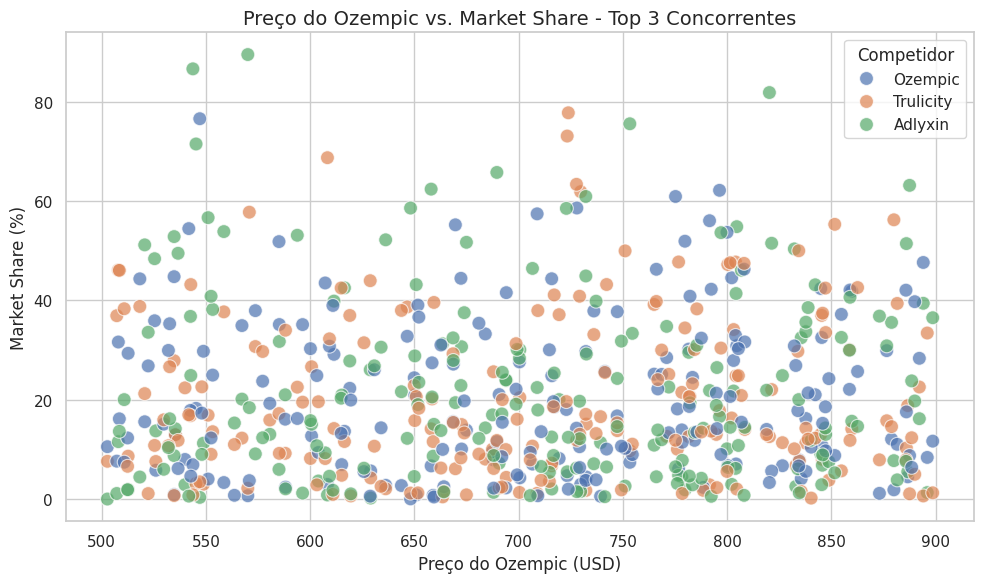

In [ ]:
#Preço vs. Market Share

top3_competitors = ['Adlyxin', 'Ozempic', 'Trulicity']
df_top3 = df[df['Competitor'].isin(top3_competitors)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top3,
                x='Price_Ozempic_USD',
                y='Market_Share_%',
                hue='Competitor',
                alpha=0.7,
                s=100)
plt.title("Preço do Ozempic vs. Market Share - Top 3 Concorrentes", fontsize=14)
plt.xlabel("Preço do Ozempic (USD)")
plt.ylabel("Market Share (%)")
plt.legend(title="Competidor")
plt.tight_layout()
plt.show()

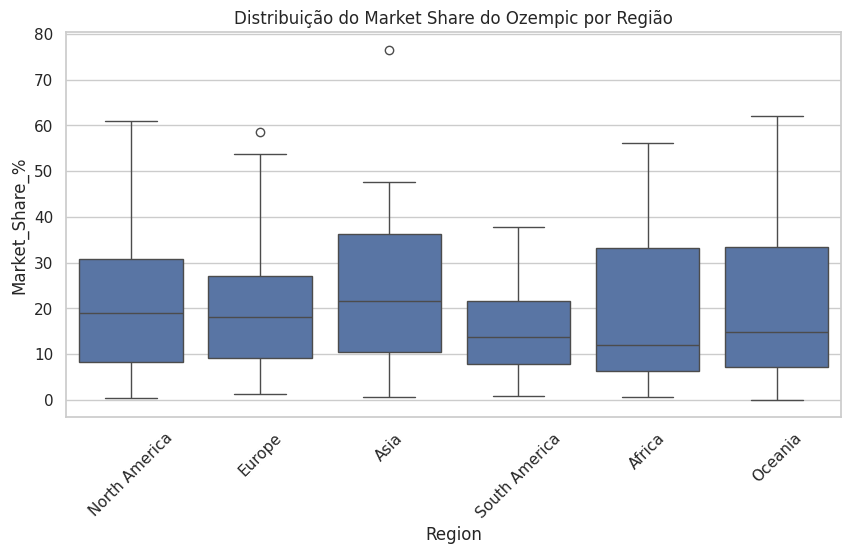

In [ ]:
#Variáveis categóricas influentes

# Boxplot Market Share por região
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='Market_Share_%', data=df[df['Competitor'] == 'Ozempic'])
plt.title("Distribuição do Market Share do Ozempic por Região")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filtrar apenas dados do Ozempic
ozempic_df = df[df['Competitor'] == 'Ozempic'].copy()

In [ ]:
# Seleciona colunas essenciais
ozempic_df = ozempic_df[['Month', 'Region', 'Price_Ozempic_USD', 'Market_Share_%']]

In [ ]:
ozempic_df.to_csv('ozempic_worldwide.csv', index=False)

In [ ]:
ozempic_df.to_csv('/content/drive/MyDrive/Projeto Ozempic - Semantix/ozempic_worldwide.csv', index=False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projeto Ozempic - Semantix/ozempic_market_share_2022_2024_worldwide.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1080 non-null   object 
 1   Region             1080 non-null   object 
 2   Competitor         1080 non-null   object 
 3   Market_Share_%     1080 non-null   float64
 4   Total_Sales_k      1080 non-null   int64  
 5   Price_Ozempic_USD  1080 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 50.8+ KB
